<font face="times new roman"> 

### <font color="red"> Final Project : Matej Pirnat - 169036994 </font>

#### <font color="blue"> Introduction and Motivation: </font>
The COVID-19 pandemic has significantly impacted healthcare systems worldwide. With the rollout of vaccination programs, it's crucial to assess the effectiveness of vaccinations in reducing hospitalization rates. This project aims to investigate the correlation between COVID-19 vaccination rates and hospitalization rates in Ontario, Canada.

#### <font color="blue"> Question: </font>
What is the relationship between COVID-19 vaccination rates and hospitalization rates in Ontario, Canada?

</font>

<font face="times new roman"> 

#### <font color="blue"> Data URL: </font>
1) https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/274b819c-5d69-4539-a4db-f2950794138c/download/vac_status_hosp_icu.csv

2) https://data.ontario.ca/datastore/dump/8a89caa9-511c-4568-af89-7f2174b4378c?bom=True

#### <font color="blue"> Data set description: </font>
The dataset contains information on the occupancy and vaccination status of intensive care unit (ICU) and hospital non-ICU units and the daily administration of COVID-19 vaccine doses and vaccination status of individuals over a period from August 10, 2021, to June 23, 2022. The dataset consists of the following columns:

Date: The date of observation. <br>
ICU_Unvac: The number of patients in the ICU who are unvaccinated. <br>
ICU_Partial_Vac: The number of patients in the ICU who are partially vaccinated. <br>
ICU_Full_Vac: The number of patients in the ICU who are fully vaccinated. <br>
HospitalNonICU_Unvac: The number of patients in the hospital non-ICU units who are unvaccinated. <br>
HospitalNonICU_Partial_Vac: The number of patients in the hospital non-ICU units who are partially vaccinated. <br>
HospitalNonICU_Full_Vac: The number of patients in the hospital non-ICU units who are fully vaccinated. <br>
previous_day_total_doses_administered: Total number of vaccine doses administered on the previous day <br>
previous_day_at_least_one: The total number of individuals who received at least one dose of the vaccine on the previous day <br>
previous_day_fully_vaccinated: Total number of individuals who were fully vaccinated on the previous day <br>
previous_day_3doses: Total number of individuals who received a third dose on the previous day <br>
total_doses_administered: The cumulative total vaccine doses administeredup to the reporting date <br>
total_individuals_at_least_one: The cumulative total of individuals who received at least one dose of the vaccine up to the reporting date <br>
total_individuals_partially_vaccinated: The cumulative total of individuals who received two doses but are not fully vaccinated up to the reporting date  <br>
total_doses_in_fully_vaccinated_individuals: The cumulative total of vaccine doses administered to fully vaccinated individuals up to the reporting date <br>
total_individuals_fully_vaccinated: The cumulative total of individuals who are fully vaccinated up to the reporting date <br>
total_individuals_3doses: The cumulative total of individuals who received a third dose up to the reporting date <br>

</font>

In [2]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [3]:
# Import the first dataset
data = pd.read_csv('vac_status_hosp_icu.csv')
df1 = pd.DataFrame(data)
df1

# Import the second dataset and filter date to match the first dataset
data2 = pd.read_csv('number_of_each_category.csv')
df2 = pd.DataFrame(data2)
df2['report_date'] = pd.to_datetime(df2['report_date'])
df2 = df2[(df2['report_date'] >= '2021-08-10') & (df2['report_date'] <= '2022-06-23')]
df2

# Merge two datasets into one
df1['date'] = pd.to_datetime(df1['date'])
df = pd.merge(df1, df2, left_on='date', right_on='report_date', how='inner')
df.drop('report_date', axis=1, inplace=True)

df

,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac,_id,previous_day_total_doses_administered,previous_day_at_least_one,previous_day_fully_vaccinated,previous_day_3doses,total_doses_administered,total_individuals_at_least_one,total_individuals_partially_vaccinated,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated,total_individuals_3doses
0,2021-08-10,22,3,0,23,4,11,222,49348,10554,38481,NaN,20541437,10847305,1233152,19228306.0,9614153,NaN
1,2021-08-11,37,5,2,34,7,8,223,48784,10797,37731,NaN,20590221,10857856,1206187,19303338.0,9651669,NaN
2,2021-08-12,45,5,2,44,7,9,224,49339,11244,37855,NaN,20639560,10868848,1179534,19378628.0,9689314,NaN
3,2021-08-13,52,5,3,65,6,8,225,49704,11773,37652,NaN,20689264,10880380,1153625,19453510.0,9726755,NaN
4,2021-08-14,53,4,1,67,6,11,226,51288,12170,38904,NaN,20740552,10892300,1126865,19530870.0,9765435,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2022-06-19,8,6,37,68,7,276,535,7014,486,901,1421.0,33752826,12615596,440498,NaN,12175098,7399204.0
314,2022-06-20,8,6,34,72,9,271,536,2289,147,301,644.0,33755115,12615519,440338,NaN,12175181,7399678.0
315,2022-06-21,6,6,43,84,12,286,537,9570,360,622,1395.0,33764685,12615592,440071,NaN,12175521,7400825.0
316,2022-06-22,7,8,38,75,16,278,538,13640,412,734,1706.0,33778325,12615732,439742,NaN,12175990,7402306.0


#### <font color="blue"> Visualization 1: </font>
The following visualization has two pie graphs, One is a population vaccinated status distribution pie chart that represents the distribution of the population based on their vaccination status. It provides insights into the proportion of individuals who are fully vaccinated, partially vaccinated, and unvaccinated. Each slice of the pie chart corresponds to a vaccination status category, with the size of the slice indicating the relative percentage of the population in that category. The other is hospitalization by vaccination status pie chart that  illustrates the distribution of hospitalizations categorized by vaccination status. It highlights the proportion of hospitalizations among different vaccination status groups, including fully vaccinated, partially vaccinated, and unvaccinated individuals. Each slice of the pie chart represents a vaccination status category, with the size of the slice indicating the percentage of hospitalizations attributed to that category.

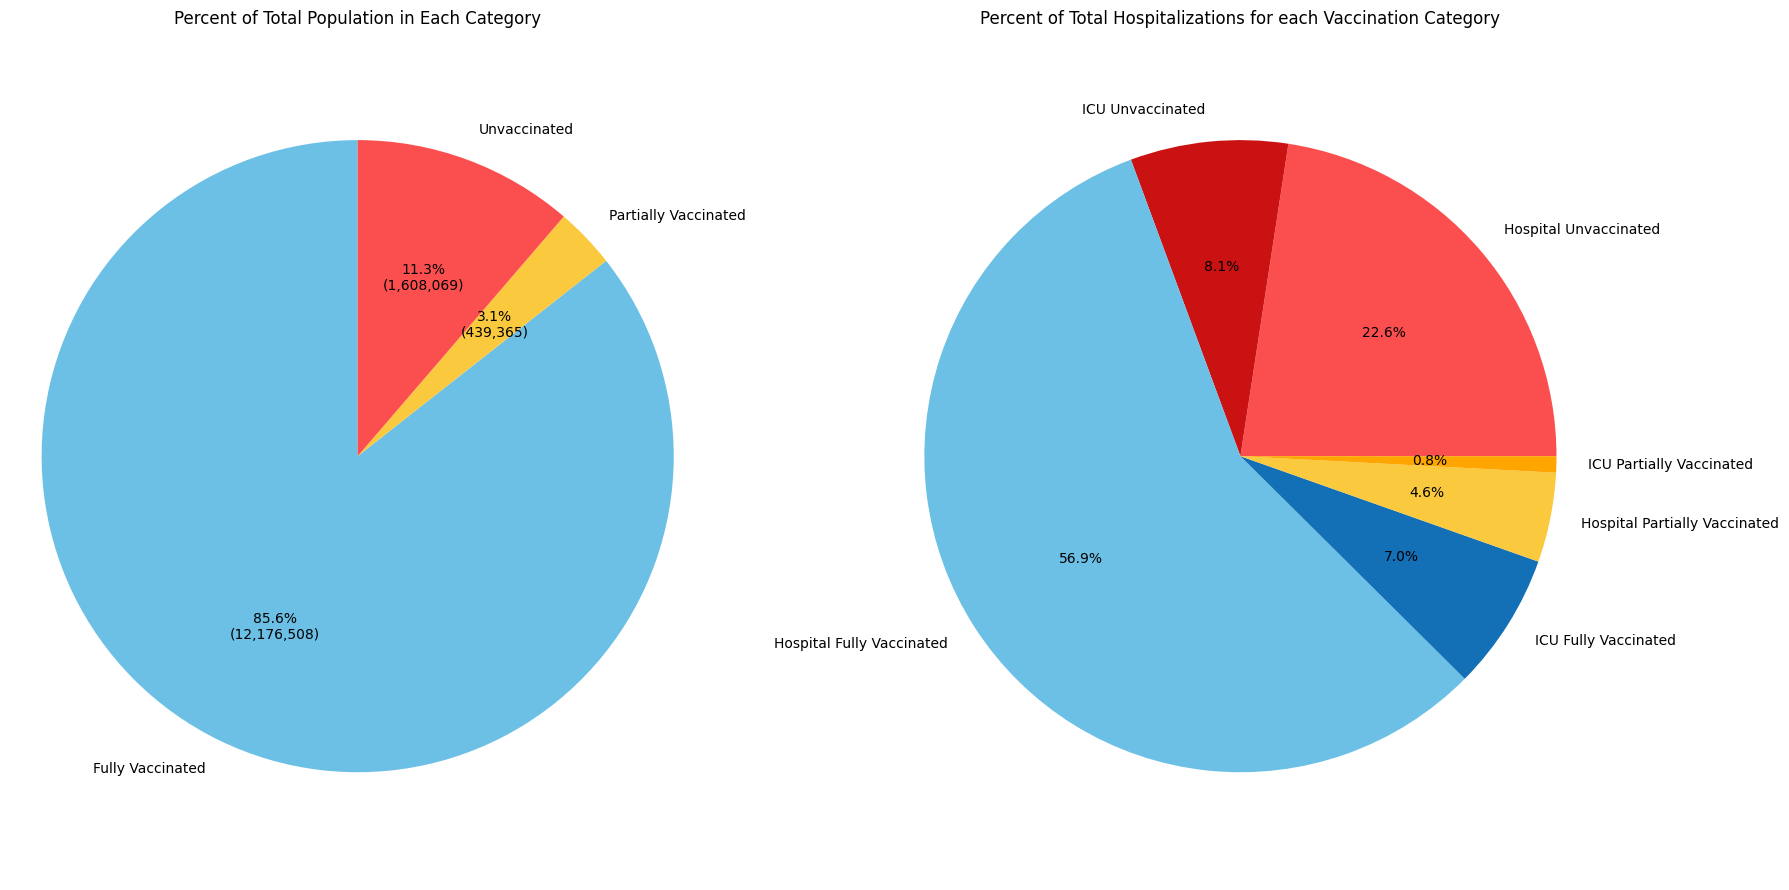

In [4]:
total_people_fully_vax = df2['total_individuals_fully_vaccinated'].iloc[-1]
total_peopel_part_vax = df2['total_individuals_partially_vaccinated'].iloc[-1]
total_people_unvax = 14223942 - total_people_fully_vax - total_peopel_part_vax
vaccination_labels = ['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated']
vaccination_sizes = [total_people_fully_vax, total_peopel_part_vax, total_people_unvax]
vaccination_colors = ['#6cc0e5', '#fbc93d', '#fb4f4f']

hospitalization_totals = df[['hospitalnonicu_unvac', 'icu_unvac',
                             'hospitalnonicu_full_vac', 'icu_full_vac',
                             'hospitalnonicu_partial_vac', 'icu_partial_vac',]].sum()
hospitalization_category_names = ['Hospital Unvaccinated', 'ICU Unvaccinated',
                                  'Hospital Fully Vaccinated', 'ICU Fully Vaccinated',
                                  'Hospital Partially Vaccinated', 'ICU Partially Vaccinated',]
hospitalization_colors = ['#fb4f4f', '#cb1212', '#6cc0e5', '#1470b6', '#fbc93d', 'orange']

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].pie(vaccination_sizes, labels=vaccination_labels, colors=vaccination_colors,
           autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, p * sum(vaccination_sizes) / 100), startangle=90)
axs[0].set_title('Percent of Total Population in Each Category')
axs[0].axis('equal')
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

axs[1].pie(hospitalization_totals, labels=hospitalization_category_names, autopct='%1.1f%%', colors=hospitalization_colors)
axs[1].set_title('Percent of Total Hospitalizations for each Vaccination Category')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


#### <font color="blue"> Visualization 2: </font>
This line plot depicts the percentage of hospitalized patients each day over time, segmented by their vaccination status.
It demonstrates trends in the proportion of hospitalized individuals among different vaccination status groups as time progresses.
Each line on the plot represents a vaccination status category, with the y-axis indicating the daily percentage of hospitalized patients and the x-axis representing time.

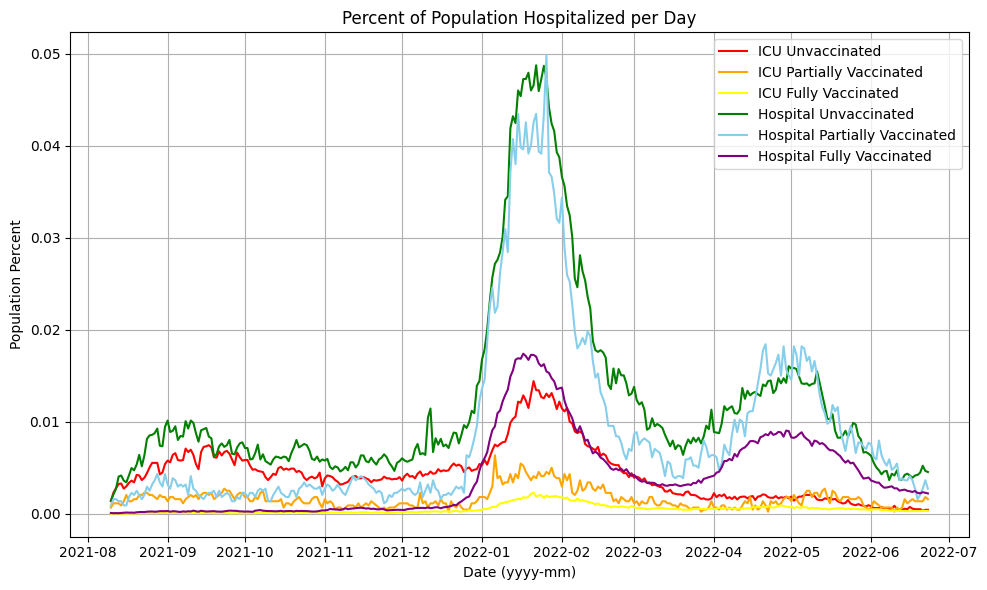

In [16]:
df['date'] = pd.to_datetime(df['date'])

df['icu_unvac_cumsum'] = df['icu_unvac']/total_people_unvax
df['icu_partial_vac_cumsum'] = df['icu_partial_vac']/total_peopel_part_vax
df['icu_full_vac_cumsum'] = df['icu_full_vac']/total_people_fully_vax
df['hospitalnonicu_unvac_cumsum'] = df['hospitalnonicu_unvac']/total_people_unvax
df['hospitalnonicu_partial_vac_cumsum'] = df['hospitalnonicu_partial_vac']/total_peopel_part_vax
df['hospitalnonicu_full_vac_cumsum'] = df['hospitalnonicu_full_vac']/total_people_fully_vax

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['icu_unvac_cumsum'] * 100, color='red', linestyle='-', label='ICU Unvaccinated')
plt.plot(df['date'], df['icu_partial_vac_cumsum'] * 100, color='orange', linestyle='-', label='ICU Partially Vaccinated')
plt.plot(df['date'], df['icu_full_vac_cumsum'] * 100, color='yellow', linestyle='-', label='ICU Fully Vaccinated')
plt.plot(df['date'], df['hospitalnonicu_unvac_cumsum'] * 100, color='green', linestyle='-', label='Hospital Unvaccinated')
plt.plot(df['date'], df['hospitalnonicu_partial_vac_cumsum'] * 100, color='skyblue', linestyle='-', label='Hospital Partially Vaccinated')
plt.plot(df['date'], df['hospitalnonicu_full_vac_cumsum'] * 100, color='purple', linestyle='-', label='Hospital Fully Vaccinated')

plt.title('Percent of Population Hospitalized per Day')
plt.xlabel('Date (yyyy-mm)')
plt.ylabel('Population Percent (%)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#### <font color="blue"> Visualization 3: </font>
These heatmaps visualize the monthly trends in hospitalizations, distinguishing between ICU and non-ICU settings and categorizing patients by their vaccination status. They provide insights into how hospitalizations vary across different months and vaccination status groups. Each cell in the heatmap corresponds to a combination of month and vaccination status category, with color intensity indicating the number of hospitalized patients in that category.

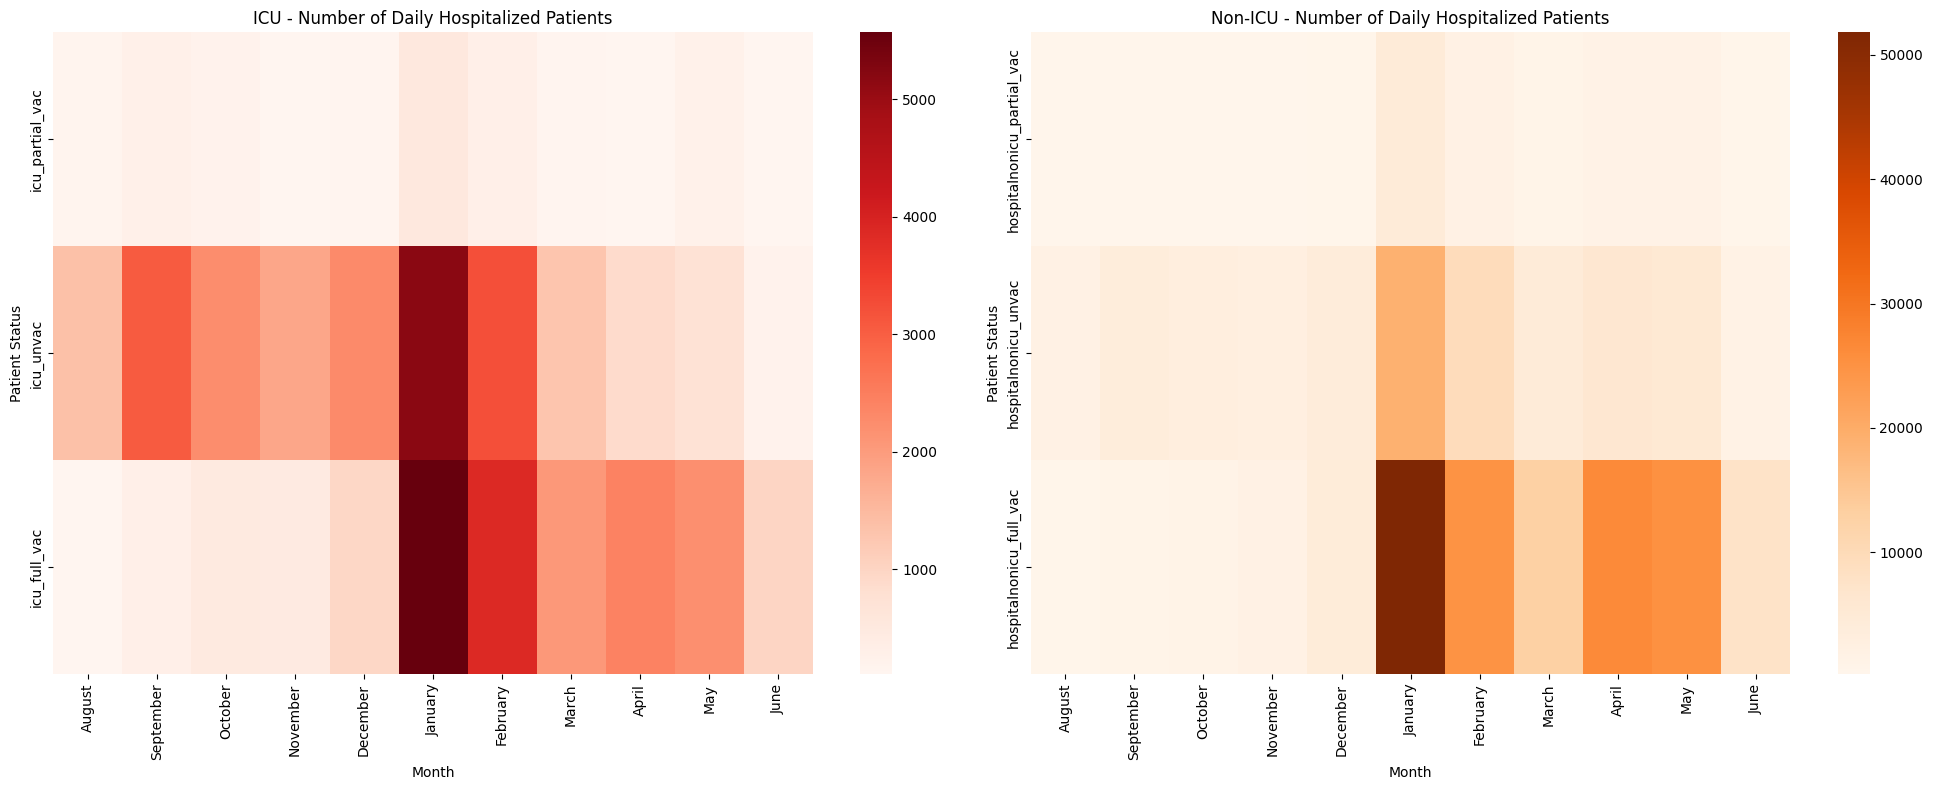

In [7]:
df['month'] = df['date'].dt.to_period('M')
heatmap_data_icu = df.groupby('month')[['icu_partial_vac', 'icu_unvac', 'icu_full_vac']].sum().T

heatmap_data_non_icu = df.groupby('month')[['hospitalnonicu_partial_vac', 'hospitalnonicu_unvac', 'hospitalnonicu_full_vac']].sum().T

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(heatmap_data_icu, cmap='Reds', ax=axes[0])
axes[0].set_title('ICU - Number of Daily Hospitalized Patients')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Patient Status')
month_labels_icu = [month.strftime('%B') for month in heatmap_data_icu.columns]
axes[0].set_xticklabels(month_labels_icu)

sns.heatmap(heatmap_data_non_icu, cmap='Oranges', ax=axes[1])
axes[1].set_title('Non-ICU - Number of Daily Hospitalized Patients')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Patient Status')
month_labels_non_icu = [month.strftime('%B') for month in heatmap_data_non_icu.columns]
axes[1].set_xticklabels(month_labels_non_icu)

plt.tight_layout()
plt.show()

<font face="times new roman"> 

#### <font color="blue"> Conclusion: </font>
Overall, these visualizations suggest that vaccination status is associated with the risk of hospitalization, with a lower proportion of hospitalizations among fully vaccinated individuals compared to unvaccinated and partially vaccinated individuals. Additionally, trends over time and seasonal variations in hospitalizations are observable and may be influenced by vaccination coverage and other factors such as disease prevalence and healthcare capacity. 

</font>